In [111]:
import ephem
import datetime
import PIL
import pylab             as     pl
import numpy             as     np
import matplotlib.pyplot as     plt

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML
from   PIL               import Image as PImage
from   IPython.display   import YouTubeVideo

In [5]:
%matplotlib inline

# From Maya to DESI

From 1800 BC to 900 AD, the Maya civilization excelled at agriculture, pottery, hieroglyph writing, calendar-making and mathematics across present day Honduras, Mexico, Guatemala, and Belize. With an astonishing legacy of impressive architecture and symbolic artwork, their formidable understanding of the heavens is perhaps the most impressive.

The Maya were expert sky-watchers, careful observers of the motions of the celestial bodies. Proof of the Mayan fascination with astronomy is literally carved in stone in the grand architecture at sites such as Chichén Itzá, Uxmal, Uaxactun, Edzna, and dozens more. At many of these sites, hieroglyphic carvings refer to celestial bodies and cycles. Often, the buildings they adorn have been built to align with significant cyclical astronomical events—solstices, equinoxes, the shifting moon, or the rise of planets.

<img src="images/ChichenItza.jpg" alt="Drawing" style="width: 800px;"/>

At Chichén Itzá, two structures bear witness to Mayan astronomy: El Castillo and El Caracol.  El Castillo—in Spanish, 'the castle'—looms at the center of Chichén Itzá, a 79-foot pyramid of stone. Also known as the Pyramid of Kukulkán, the structure embodies Mayan myth along with natural astronomical cycles.  Every year, tens of thousands of visitors flock to Chichén Itzá to see 'the snake', an apparition made of shadows that descends the stairs at El Castillo during the solar equinoxes each spring and fall.

The phenomenon that El Castillo is famous for occurs twice each year, at the spring and fall equinoxes. (In fact, the effect is viewable for a week before and after each equinox.) As the equinox sun sets, a play of light and shadow creates the appearance of a snake that gradually undulates down the stairway of the pyramid. This diamond-backed snake is composed of seven or so triangular shadows, cast by the stepped terraces of the pyramid. The sinking sun seems to give life to the sinuous shadows, which make a decidedly snaky pattern on their way down the stairs.

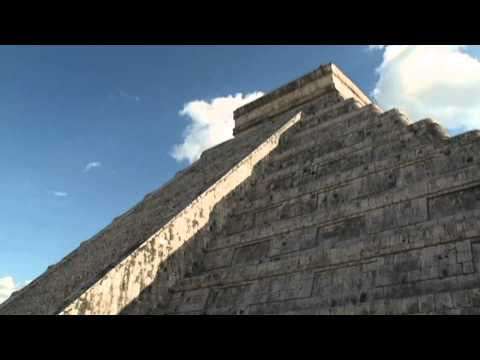

In [15]:
YouTubeVideo('Zvv9EnBuem4', width=800, height=400)

Other features of El Castillo suggest astronomical understanding and intent on the part of the Mayan builders. The structure as a whole seems to be aligned with an important astronomical axis: The west plane of the pyramid faces the zenith passage sunset. Meanwhile, each of the four (exceedingly steep) stairways that climb the pyramid has 91 steps, with a final step at the top making a total of 365, the number of days in a solar year. Ninety-one is also the number of days that separate each of the four phases of the annual solar cycle: winter solstice, spring equinox, summer solstice, and fall equinox.

Using the patterns of light and shadow appearing on El Castillo throughout the year, the Maya could easily have tracked the seasons and marked these four annual solar events—the two solstices and two equinoxes. And so it seems the ancient Maya may have used this structure as, among other things, a calendar to signal appropriate times to plant, harvest, and perform ceremonies.

We'll use the awesome Ephem package to explore how these magnificent buildings were designed.  First by creating instances for each of the sun and venus, which allows us to calculate many things about them today and in the past.   

In [18]:
venus = ephem.Venus()
sun   = ephem.Sun()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec, ephem.constellation(venus)[1])

8:28:58.50 17:51:55.0 Cancer


Here, we see that Venus the position of Venus in the night sky, which is in the constellation of Cancer tonight!  Minutes walk from Kukulkan, 'El Caracol' Obseravatory was central to the serious business of Mayan Astronomy, where observations of Venus were of religious importance.

<img src="images/caracol.jpg" alt="Drawing" style="width: 800px;"/>

Carefully aligned with the motions of Venus. Venus had tremendous significance for the Maya; this bright planet was considered the sun’s twin and a war god. Mayan leaders used the changing position of Venus to plan appropriate times for raids and battles.  At El Caracol, dubbed 'the observatory', narrow shaftlike windows frame important astronomical events. One such window marks an appearance of Venus at a particular point on the horizon that takes place—like clockwork—once every eight years.

Let's use ephem to set up observations from caracol.

In [37]:
caracol         = ephem.Observer()

# Ordinary latitude and longitude of El Carcarol.
caracol.lat     = '20.683056'
caracol.lon     = '88.568611'

# 
caracol.horizon = 0.0

In [24]:
# First rising date time:  2020/1/2 03:01:29
# First sun rise;  print(chichen_itza.previous_rising(sun))

# Define our first observation on 1st January 2020, at 23:52 and a bit!
start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(23, 52, 2)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

# We'll calculate the positions of Venus up until 2030. 
end_date           = datetime.datetime(2030, 1, 1)

# every hour. 
delta              = datetime.timedelta(hours=1)

# Store the date and time of 'each observation'.
datetimes          = []

# Store the angular position. 
angular_pos        = []

# Will store the [magnitude (brightness), diameter in arcseconds, distance from the Earth, phase, and separation
# of Venus from the sun in degrees (elongation or elong)].
props              = []

# Store the time of sunrise on each day. 
sunrises           = []

while start_datetime  <= end_date:    
    start_datetime += delta
    
    # Set our date and time of observation. 
    caracol.date    = start_datetime.strftime("%Y/%m/%d %H:%M:%S")

    # Calculate everything for the sun and Venus. 
    sun.compute(caracol)
    venus.compute(caracol)
    
    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase, venus.elong])
    
    # alt or altitude is the height of the sun and Venus above the horizon in degrees.  An altitude of 90 deg. would 
    # be right above you!  This is also known as the 'zenith' amongst the pros. 
    angular_pos.append([caracol.date, sun.alt, venus.az, venus.alt])

    sunrises.append(caracol.previous_rising(sun))
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [26]:
# We've been collecting things in 'lists', but convert to numpy arrays as much easier to do calculations.
angular_pos = np.array(angular_pos)
props       = np.array(props)
sunrises    = np.array(sunrises)

In [27]:
# Convert from randians to degrees.
angular_pos[:,1:] *= 180. / np.pi

In [28]:
# Sunrises is a series of numbers that represent the date and time of the observation, with a bigger number being a 
# later observation.  Here, we're going to start are clock at the time when we see venus and the sun are closely together.
sunrises   -= 44567

In [29]:
# A list of the colors for the lines we will plot.
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

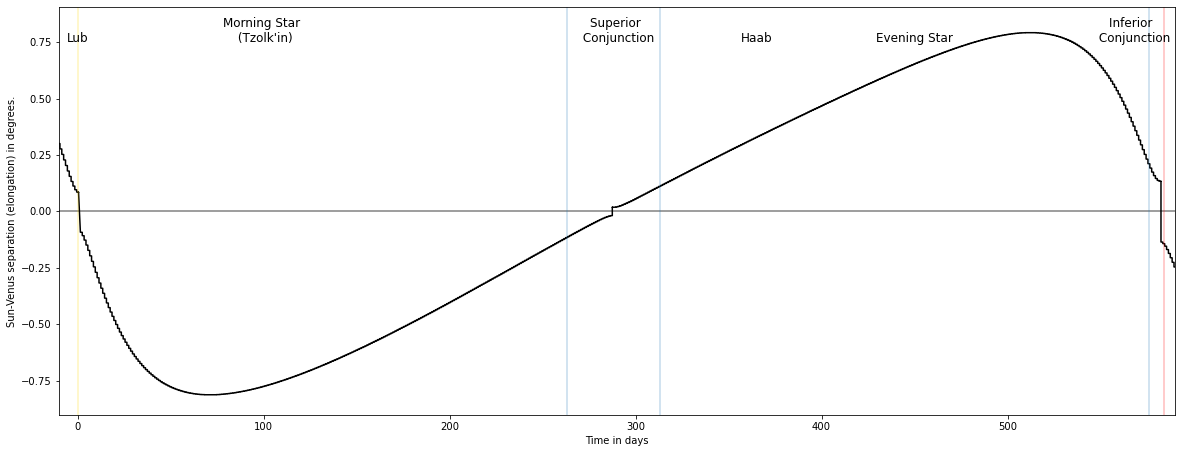

In [40]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, props[:,-1], c='k')
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
    
ax.axhline(0.0, alpha=0.5, c='k')
    
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
ax.text(x=0,   y=0.75, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=0.75, s='Morning Star \n (Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=0.75, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=0.75, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=0.75, s='Evening Star', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=0.75, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)
    
pl.savefig('images/venus.pdf')

For the Mayans, this was an incredibly special curve!  So much so, they designed (one of) their calendars, the Tzolk'in, based on it!  This calendar would start on the Lub, when venus was so close to the sun (elongation $\simeq 0.0$) that it would be hidden completely.  Soon, as you watched the horizon close to sunrise each day, Venus would become a 'Morning Star' - Venus would rise above the horizon just in time to be seen before the brightness of the Sun would drown it out with morning. 

Venus would continue to be a Morning Star for 263 days, at which point the paths of the Sun and Venus would be so close each day that the Sun's brightness would shield it completely.  In amateur and professional astronomy, this is known as the 'Superior Conjunction', which lasts for 50 days.  The 263 days duration of the Morning Star would go on to define the Tzolk'in year. 

We're now 365 days in, a year to us or a Haab to the Mayans!  By this point, Venus is an 'Evening star':

The `Inferior conjuntion' closes out the 'synodic period' of Venus, exactly the same as the superior but for a much shorter 8 days!  At the end of the synodic period, 584 days, Ground Hog day begins again for Venus and everything repeats!

So complicated is Venus’s disappearing act that the ancient Greeks misconstrued it as two different stars. The Mayans knew better, and they recognized Venus in both the morning and evening skies as one and the same.

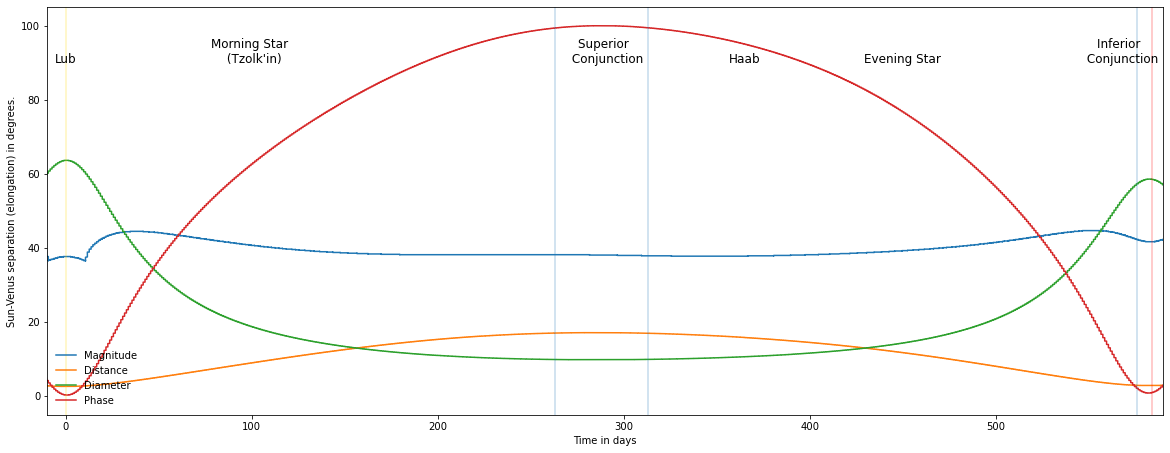

In [77]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, -10. * props[:,0], label='Magnitude')
ax.plot(sunrises,  10. * props[:,2], label='Distance')
ax.plot(sunrises,        props[:,1], label='Diameter')
ax.plot(sunrises,        props[:,3], label='Phase')    
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
        
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
yy = 90.
    
ax.text(x=0,   y=yy, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=yy, s='Morning Star \n (Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=yy, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=yy, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=yy, s='Evening Star', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=yy, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)

ax.legend(frameon=False, loc=3)

It just so happens that the synodic period of Venus (584 days) relates to the orbital period of the earth (365 days) in a relatively simple ratio of 5:8. Five times the synodic period of Venus (5 x 584 days) is 2,920 days. If you divide 2,920 by the 365 days in our year, you get 8. In short, the motions of Venus relative to our sun repeat almost exactly every 8 years. Eight years would have been a useful span of time for ancient sky-watchers, who relied heavily on natural cycles to mark time.

Let's see how Mayans today would observe this, and how they recorded this observation in 500 AD! 

In [98]:
# We'll calculate the angular position of Venus for each of the five synodic cycles (584 day) that's required for things to repeat.
cycles        = {}

In [99]:
for i in range(5):
  zero        = 584. * i

  # Sun is above the horizon.
  in_cycle    = (sunrises >= zero)        & (sunrises < zero + 585.) & (angular_pos[:,1] > 0.)

  in_morning  = (sunrises >= zero)        & (sunrises < zero + 263.) & (angular_pos[:,1] > 0.)
  in_superior = (sunrises >= zero + 263.) & (sunrises < zero + 313.) & (angular_pos[:,1] > 0.)
  in_evening  = (sunrises >= zero + 313.) & (sunrises < zero + 576.) & (angular_pos[:,1] > 0.)
  in_inferior = (sunrises >= zero + 576.) & (sunrises < zero + 584.) & (angular_pos[:,1] > 0.)

  cycles[i]   = [in_morning, in_superior, in_evening, in_inferior]

In [114]:
labels        = ['Morning Star', 'Superior', 'Evening Star', 'Inferior'] 

def plot_mayan(cycle, epoch, ext=None):
  fig, ax     = plt.subplots(1, 1, figsize=(15, 5.))

  im          = PImage.open('images/Mayan_Morning_{}.png'.format(cycle))  
    
  width, height = im.size

  size        = 256, 256
  im.thumbnail(size, PImage.ANTIALIAS)

  im          = np.array(im).astype(np.float) / 255 

  color       = color_cycle[cycle]
  sample      = cycles[cycle][epoch]
  label       = labels[epoch]

  # for i, (color, sample, label) in enumerate(zip(color_cycle, cycles[j], labels)):
  ax.plot(angular_pos[sample,2],    angular_pos[sample,3],    c=color, lw=0.0, marker='.', label=label)
  ax.plot(angular_pos[sample,2][0], angular_pos[sample,3][0], c='k', lw=0.0, marker='.')
  
  ax.legend(frameon=False, loc=1)
  
  ax.set_xlim(left=360., right=0.0)

  if ext is not None:
    title = label + ':  ' + ext

  else:
    title = label
    
  ax.set_title(title)
    
  fig.figimage(im, 320, 30)

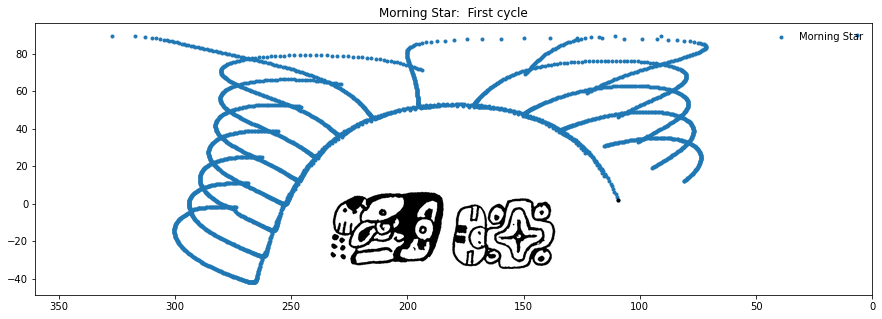

In [115]:
plot_mayan(0, 0, ext='First cycle')

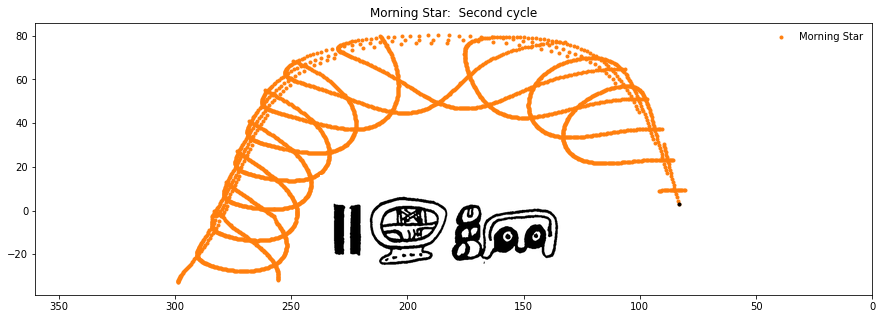

In [116]:
plot_mayan(1, 0, ext='Second cycle')

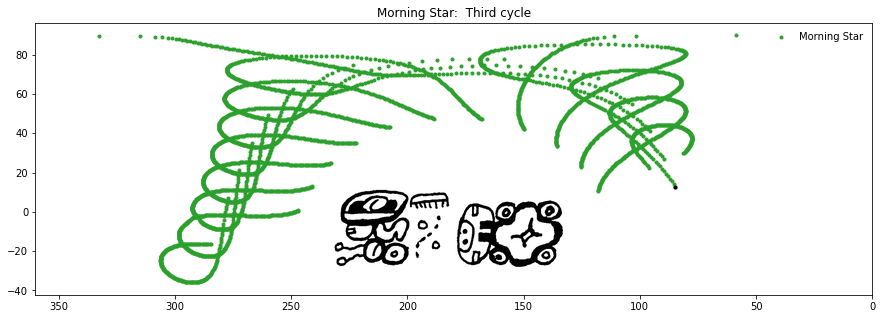

In [117]:
plot_mayan(2, 0, ext='Third cycle')

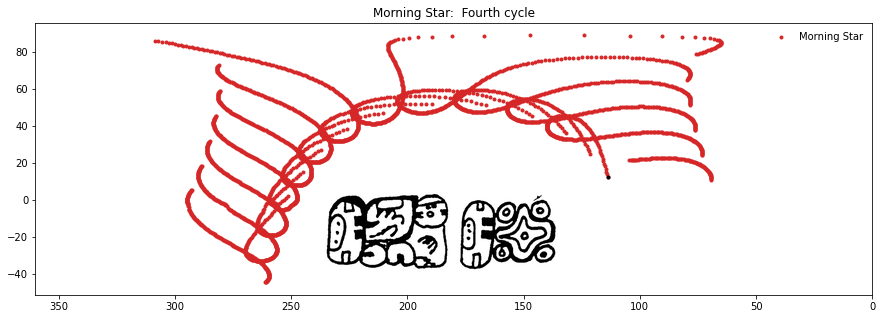

In [118]:
plot_mayan(3, 0, ext='Fourth cycle')

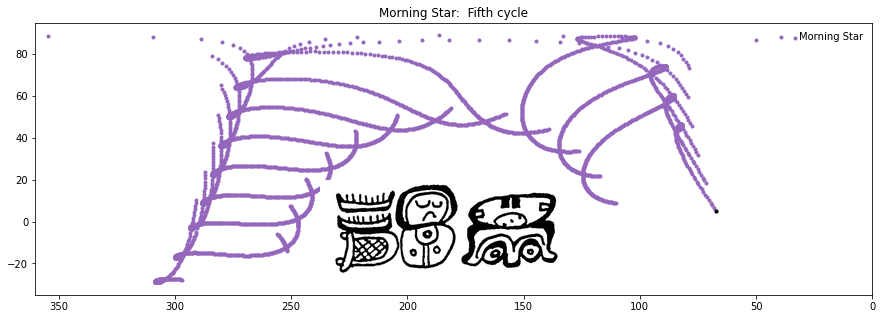

In [119]:
plot_mayan(4, 0, ext='Fifth cycle')

At this point, after eight years, Venus and the Sun return to the same point in the sky and the dance begins all over again!  They Mayans documented this behaviour religiously, in what is now known as the Dresden Codex:

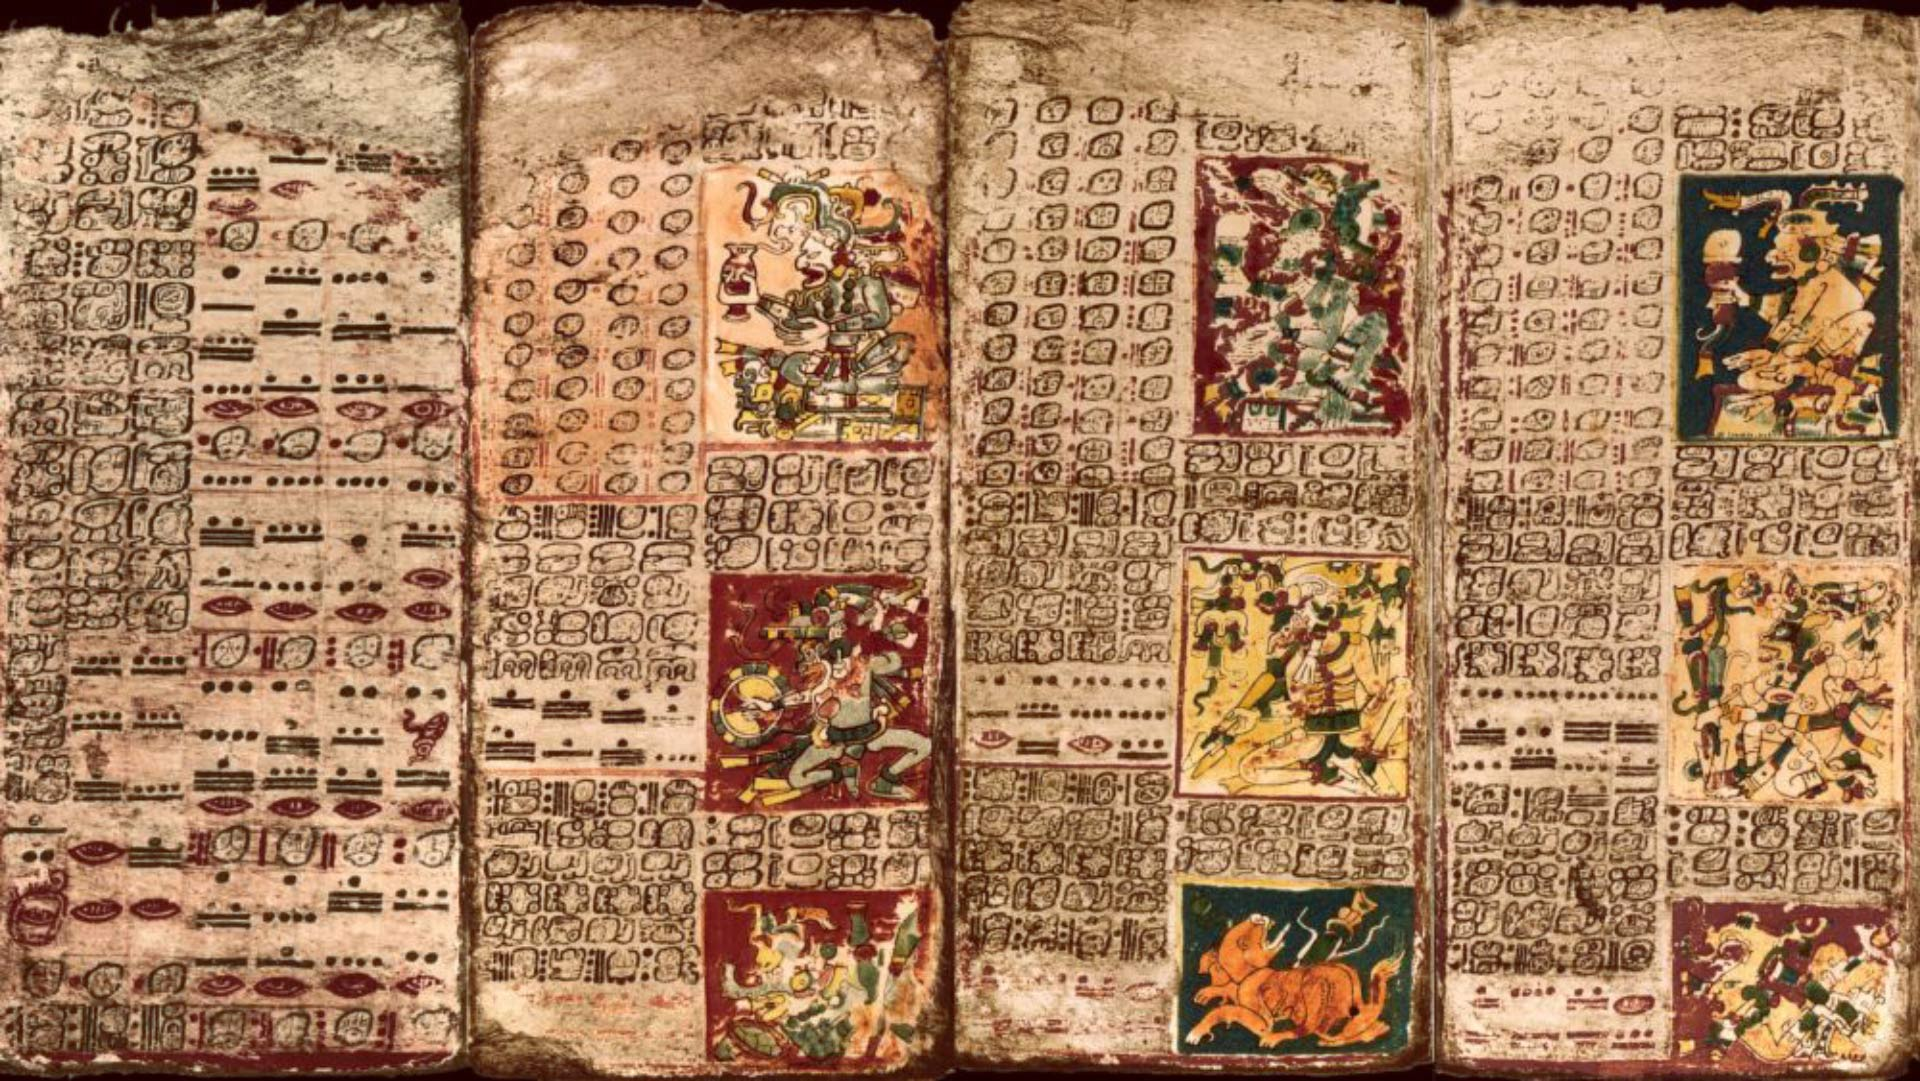

In [120]:
Image(filename='images/DresdenCodex.jpg')

For page after page, in the Codex, the Mayans recorded the dates at which Venus switched from a Morning Star, to a Superior Conjuction, to an Evening Star, to an Inferior Injunction and so on, with incredible accuracy.  Compared to modern accuracy, then were often within one to a few days!  The Mayans didn't do fractions, so it was hard to agree exactly.  

Each page would have a row of four dates, marking these transitions.  The same row on five consectutive pages would record these same transitions for the five synodic cycles (of 584 days) completing a Lub, or 2920 days, when the sun and venus would begin the same dance again. 

After thirteen lubs, or 104 Haab (years), the table returns to its Lubay or "great resting place" where all the cycles begin again - the sun and venus have returned to the starting positions on the first day of a Tzolk'in month.  The whole cycle then repeats itself.  The Universe must have seemed in perfect harmony with their world on that _Ahaw_ day when the Lubay was reached and the thirteen cycles of Venus begin again. 

In [124]:
print(365. * 104, 260 * 146., 584. * 65., 2920. * 13)

37960.0 37960.0 37960.0 37960.0
